# Sinha / Saha exploration

> From 4:28 mark of [New Recipe for Pi - Numberphile](https://youtu.be/nXexsSWrc1Q?t=268s)

He also discusses values for lambda (λ) at 605s (10:05).

`SinhaSaha:=(N, lambda) = 4+sum(1/k!*(1/(k+lambda)-4/(2*k+1))*pochhammer((2*k+1)^2/4/(k+lambda)-k, k-1), k=1..N);`

In [1]:
import sympy as sp

sp.init_printing()

n, λ = sp.symbols('n λ')
SinhaSaha = sp.symbols('SinhaSaha', cls=sp.Function)

## sympy representation of SinhaSaha
![Appendix snippet](./snippet.svg)

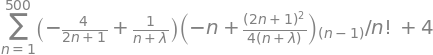

In [2]:
# sum_end = sp.oo
sum_end = 500
SinhaSaha = 4 + sp.Sum(
    (1 / sp.factorial(n)) *
    (1 / (n+λ) - 4 / (2*n + 1)) *
    sp.ff(
        ((2*n + 1)**2 /
         (4 * (n + λ)).factor()
         - n),
        n-1),
    (n, 1, sum_end))
SinhaSaha

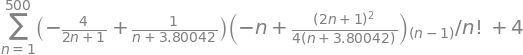

In [3]:
# sub_expr = SinhaSaha.subs({λ: 3.87}).doit(deep=False)  # when sum_end = 30
sub_expr: sp.Add = SinhaSaha.subs({λ: 3.80042}).doit(deep=False)
sub_expr

In [4]:
print(f'{type(sub_expr)=}')
(sub_expr - sp.pi).doit(deep=True)

type(sub_expr)=<class 'sympy.core.add.Add'>


RecursionError: maximum recursion depth exceeded